<a href="https://colab.research.google.com/github/PatrykCiwinski/Fungi_CNN/blob/main/grzyby.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import requests
from bs4 import BeautifulSoup
from PIL import Image
from io import BytesIO
import os
import random
import numpy as np
from numpy import asarray
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd
import seaborn as sns

In [12]:
podkategoria = 'grzyby'
tagi = 'jadalne'
strona = 1

In [13]:
url = f'https://www.ekologia.pl/wiedza/grzyby/tagi,{tagi},s{strona}'

In [14]:
response = requests.get(url)
content = response.content

In [15]:
soup = BeautifulSoup(content, 'html.parser')
imgs = soup.select('div.pro_eko img')
urls = [img['src'] for img in imgs]

In [16]:
urls

['https://zasoby.ekologia.pl/grzyby/a/301/shutterstock-1349274215_mini.jpg',
 'https://zasoby.ekologia.pl/grzyby/a/266/shutterstock-701949721_mini.jpg',
 'https://zasoby.ekologia.pl/grzyby/a/2/640px-boletus-impolitus_mini.jpg',
 'https://zasoby.ekologia.pl/grzyby/a/302/shutterstock-1566904369_mini.jpg',
 'https://zasoby.ekologia.pl/grzyby/a/11/6-borowik-szlachetny-boletus-edulis_mini.jpg',
 'https://zasoby.ekologia.pl/grzyby/a/5/1280px-boletus_mini.jpg',
 'https://zasoby.ekologia.pl/grzyby/a/254/800px-Butyriboletus-persolidus-72425-Novato-California-20091109-retouched_mini.jpg',
 'https://zasoby.ekologia.pl/grzyby/a/67/800px-hand-utri_mini.jpg',
 'https://zasoby.ekologia.pl/grzyby/a/68/czernidlak-kolpakowaty_mini.jpg',
 'https://zasoby.ekologia.pl/grzyby/a/69/shutterstock-1824266690_mini.jpg',
 'https://zasoby.ekologia.pl/grzyby/a/228/shutterstock-1568489815_mini.jpg',
 'https://zasoby.ekologia.pl/grzyby/a/129/px-Chlorophyllum_rachodes_mini.jpg']

In [17]:
response = requests.get(urls[5])
content = response.content

In [18]:
img = Image.open(BytesIO(content))

In [19]:
img.save('grzybnia5.jpg')

In [20]:
def get_page(tagi,
             strona):
  
  url = f'https://www.ekologia.pl/wiedza/grzyby/tagi,{tagi},s{strona}' 
  response = requests.get(url)
  content = response.content
  return content


def parse_imgs_url(content):
  soup = BeautifulSoup(content, 'html.parser')
  imgs = soup.select('div.pro_eko img')
  return [img['src'] for img in imgs]


def get_image(url, path, tagi):
    response = requests.get(url)
    content = response.content
    img = Image.open(BytesIO(content))
    os.makedirs(f'{path}/{tagi}', exist_ok=True)
    name=url.split('/')[-1].split('.')[0].split('_')[:2]
    name=' '.join(map(str, name))
    img.save(f'{path}/{tagi}/{name}.jpg')


def get_data(tagi,
             start_page,
             end_page,
             path):
  
  for strona in range(start_page, end_page + 1):
    content = get_page(tagi, strona)
    urls = parse_imgs_url(content)

    for i, url in enumerate(urls):
      get_image(url, path, tagi)
      if i % 2 == 0:
        print(f'Downloaded {i} for page {strona} from {tagi}')

In [21]:
def get_first_page(tagi):
  
  url = f'https://www.ekologia.pl/wiedza/grzyby/tagi,{tagi}' 
  response = requests.get(url)
  content = response.content
  return content


def get_data_first_page(tagi,
             path):
    content = get_first_page(tagi)
    urls = parse_imgs_url(content)
  

In [22]:
data_path = '/content/drive/MyDrive/grzyby1/data/train'

In [ ]:
get_data('jadalne',1,16,path = data_path)

In [ ]:
get_data('niejadalne',1,16,path = data_path)

In [ ]:
get_data('trujace',1,16,path = data_path)

In [26]:
get_data_first_page('jadalne',path = data_path)

In [27]:
get_data_first_page('niejadalne',path = data_path)

In [28]:
get_data_first_page('trujace',path = data_path)

In [29]:
data_path = '/content/drive/MyDrive/grzyby1/data'
os.makedirs(data_path + '/test', exist_ok=True)
test_size = 0.2

for subcategory in ['jadalne', 'niejadalne', 'trujace']:
  os.makedirs(data_path + '/test/' + subcategory, exist_ok=True)
  file_list = os.listdir(data_path + '/train/' + subcategory)
  number_of_samples = int(len(file_list) * test_size)
  for file_name in random.sample(file_list, number_of_samples):
    os.rename(data_path + '/train/' + subcategory + '/' + file_name,
              data_path + '/test/' + subcategory + '/' + file_name)

In [31]:
len(os.listdir(data_path + '/test/jadalne'))

35

In [32]:
from tensorflow import keras

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
import keras.utils as image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [147]:
image_gen = ImageDataGenerator(rotation_range=10,
                     width_shift_range=0.05,
                     height_shift_range=0.05,
                     zoom_range=0.2,fill_mode='nearest')

In [102]:
dim1 = []
dim2 = []
for name in os.listdir('/content/drive/MyDrive/grzyby1/data/train/jadalne'):
    
    img = imread('/content/drive/MyDrive/grzyby1/data/train/jadalne'+'/'+name)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

In [103]:
np.mean(dim1)

115.0

In [104]:
np.mean(dim2)

170.03521126760563

In [105]:
image_shape = (115,170,3)

In [106]:
batch_size=16

In [148]:
train_image_gen = image_gen.flow_from_directory('/content/drive/MyDrive/grzyby1/data/train',
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical')

Found 321 images belonging to 3 classes.


In [149]:
test_image_gen = image_gen.flow_from_directory('/content/drive/MyDrive/grzyby1/data/test',
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical',shuffle=False)

Found 78 images belonging to 3 classes.


In [150]:
train_image_gen.class_indices

{'jadalne': 0, 'niejadalne': 1, 'trujace': 2}

In [151]:
model = Sequential()

model.add(layers.Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))


model.add(layers.Flatten())


model.add(layers.Dense(128))
model.add(layers.Activation('relu'))

model.add(layers.Dropout(0.5))


model.add(layers.Dense(3))
model.add(layers.Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [152]:
early_stop = EarlyStopping(monitor='val_accuracy',patience=3)

In [153]:
history = model.fit(train_image_gen,epochs=20,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

Epoch 1/20
21/21 [==============================] - 4s 104ms/step - loss: 15.7187 - accuracy: 0.4112 - val_loss: 1.0752 - val_accuracy: 0.4359
Epoch 2/20
21/21 [==============================] - 2s 98ms/step - loss: 1.0572 - accuracy: 0.4642 - val_loss: 1.0736 - val_accuracy: 0.3974
Epoch 3/20
21/21 [==============================] - 3s 131ms/step - loss: 1.0637 - accuracy: 0.4642 - val_loss: 1.0626 - val_accuracy: 0.3846
Epoch 4/20
21/21 [==============================] - 2s 94ms/step - loss: 1.0287 - accuracy: 0.4735 - val_loss: 1.0363 - val_accuracy: 0.4103


In [154]:
my_image = image.load_img('/content/drive/MyDrive/grzyby1/data/test/trujace/muchomor mini.jpg',target_size=image_shape)

In [155]:
my_image = image.img_to_array(my_image)

In [156]:
my_image = np.expand_dims(my_image, axis=0)

In [157]:
my_image.shape

(1, 115, 170, 3)

In [158]:
predict=model.predict(my_image)
predictions=np.argmax(predict,axis=1)

1/1 [==============================] - 0s 88ms/step


In [159]:
predictions

array([0])

In [119]:
test_image_gen.class_indices

{'jadalne': 0, 'niejadalne': 1, 'trujace': 2}

In [120]:
result=pd.DataFrame(history.history)

<Axes: >

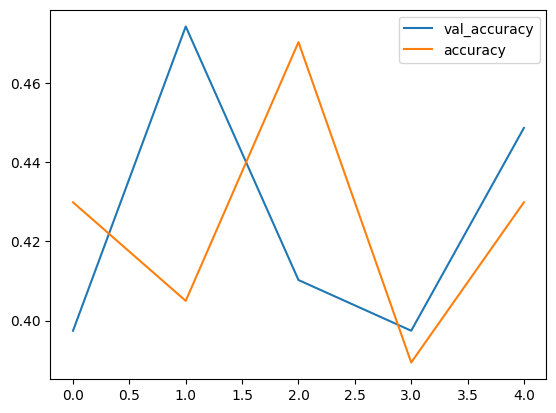

In [121]:
result[['val_accuracy','accuracy']].plot()

<Axes: >

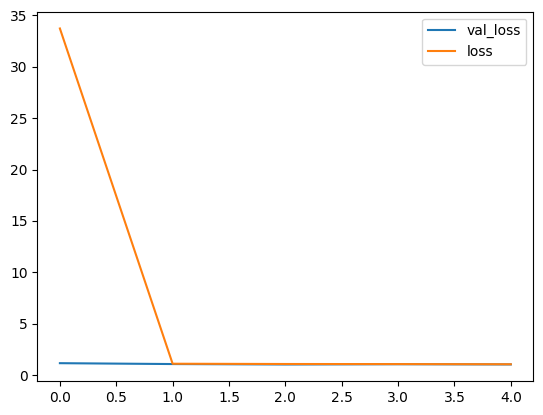

In [122]:
result[['val_loss','loss']].plot()

In [123]:
from sklearn.metrics import classification_report

In [160]:
predict = model.predict(test_image_gen)

5/5 [==============================] - 0s 73ms/step


In [161]:
predictions=np.argmax(predict,axis=1)

In [162]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.62      0.23      0.33        35
           1       0.45      0.85      0.59        34
           2       0.00      0.00      0.00         9

    accuracy                           0.47        78
   macro avg       0.35      0.36      0.31        78
weighted avg       0.47      0.47      0.40        78



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
